# Initialisierung

Zuerst werden die Dateien geladen und grob angezeigt, um eine Überblick zu bekommen.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
df_train = pd.read_csv ('dataset/train.csv', index_col='Id')
df_test = pd.read_csv ('dataset/test.csv', index_col='Id')

In [2]:
df_train.head()

,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,...,Garagenqualitaet,Garagenzustand,EinfahrtGepflastert,Sondermerkmal,SondermerkmalWert,Verkaufsmonat,Verkaufsjahr,Verkaufstyp,Verkaufsbedingung,Verkaufspreis
Id,,,,,,,,,,,,,,,,,,,,,
1,WN,Gallus,Norm,Norm,20,1Fam,1Sto,1962,1962,3,...,Du,Ar,J,NaN,0.0,7,2019,GarK,Normal,69700.0
2,WN,Gallus,Norm,Norm,20,1Fam,1Sto,2015,2016,5,...,Du,Du,J,NaN,0.0,6,2017,GarK,Normal,133450.0
3,WN,Eckenhe,Norm,Norm,50,1Fam,2Sto,1930,1960,6,...,Du,Du,P,NaN,0.0,9,2016,GarK,Normal,165750.0
4,WN,Ginnhei,Norm,Norm,60,1Fam,2Sto,2009,2010,6,...,Du,Du,J,NaN,0.0,5,2017,GarK,Normal,157250.0
5,WN,Eckenhe,Norm,Norm,70,1Fam,2Sto,1939,1960,8,...,Du,Du,J,NaN,0.0,6,2016,GarK,Normal,195500.0


In [3]:
df_test.head()

,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,...,Garagenflaeche,Garagenqualitaet,Garagenzustand,EinfahrtGepflastert,Sondermerkmal,SondermerkmalWert,Verkaufsmonat,Verkaufsjahr,Verkaufstyp,Verkaufsbedingung
Id,,,,,,,,,,,,,,,,,,,,,
2001,WN,Flughaf,Norm,Norm,120,StHau,1Sto,1987,1987,7,...,39.60,Du,Du,J,NaN,0.0,9,2018,GarK,Normal
2002,WM,Altstad,Norm,Norm,190,2famU,1.5V,1920,2006,4,...,0.00,NaN,NaN,N,NaN,0.0,6,2018,GarK,Normal
2003,WN,Altstad,Norm,Norm,50,1Fam,1.5V,1910,2008,4,...,25.20,Ar,Du,J,NaN,0.0,3,2016,GarK,Normal
2004,WN,Gallus,Zubr,Norm,70,1Fam,2Sto,1920,2010,4,...,47.52,Du,Du,J,Schu,357.0,10,2016,GarK,Normal
2005,WN,Dornbus,Norm,Norm,20,1Fam,1Sto,1965,2003,5,...,27.27,Du,Du,J,NaN,0.0,11,2019,GeBU,Normal


Da die Test-datei keinen Verkaufspreis enthält und deshalb eine Spalte wegniger als die Train-datei hat, wird der Verkaufspreis ausgeschnitten.

In [4]:
y_train = df_train['Verkaufspreis']
df_train = df_train.drop(['Verkaufspreis'], axis=1)
df_train.head()

,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,...,Garagenflaeche,Garagenqualitaet,Garagenzustand,EinfahrtGepflastert,Sondermerkmal,SondermerkmalWert,Verkaufsmonat,Verkaufsjahr,Verkaufstyp,Verkaufsbedingung
Id,,,,,,,,,,,,,,,,,,,,,
1,WN,Gallus,Norm,Norm,20,1Fam,1Sto,1962,1962,3,...,47.52,Du,Ar,J,NaN,0.0,7,2019,GarK,Normal
2,WN,Gallus,Norm,Norm,20,1Fam,1Sto,2015,2016,5,...,40.50,Du,Du,J,NaN,0.0,6,2017,GarK,Normal
3,WN,Eckenhe,Norm,Norm,50,1Fam,2Sto,1930,1960,6,...,28.62,Du,Du,P,NaN,0.0,9,2016,GarK,Normal
4,WN,Ginnhei,Norm,Norm,60,1Fam,2Sto,2009,2010,6,...,41.40,Du,Du,J,NaN,0.0,5,2017,GarK,Normal
5,WN,Eckenhe,Norm,Norm,70,1Fam,2Sto,1939,1960,8,...,36.00,Du,Du,J,NaN,0.0,6,2016,GarK,Normal


In [5]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 1 to 2000
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wohngebiet                   1997 non-null   object 
 1   Nachbarschaft                2000 non-null   object 
 2   Bedingung1                   2000 non-null   object 
 3   Bedingung2                   2000 non-null   object 
 4   Wohnungsklasse               2000 non-null   int64  
 5   Gebauedetyp                  2000 non-null   object 
 6   Wohnungsstil                 2000 non-null   object 
 7   Baujahr                      2000 non-null   int64  
 8   Umbaujahr                    2000 non-null   int64  
 9   Hausqualitaet                2000 non-null   int64  
 10  Hauszustand                  2000 non-null   int64  
 11  Versorgung                   1998 non-null   object 
 12  Grundstuecksgroesse          2000 non-null   float64
 13  Grundstuecksform       

In [6]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 919 entries, 2001 to 2919
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wohngebiet                   918 non-null    object 
 1   Nachbarschaft                919 non-null    object 
 2   Bedingung1                   919 non-null    object 
 3   Bedingung2                   919 non-null    object 
 4   Wohnungsklasse               919 non-null    int64  
 5   Gebauedetyp                  919 non-null    object 
 6   Wohnungsstil                 919 non-null    object 
 7   Baujahr                      919 non-null    int64  
 8   Umbaujahr                    919 non-null    int64  
 9   Hausqualitaet                919 non-null    int64  
 10  Hauszustand                  919 non-null    int64  
 11  Versorgung                   919 non-null    object 
 12  Grundstuecksgroesse          919 non-null    float64
 13  Grundstuecksform     

In [7]:
y_train

Id
1        69700.00
2       133450.00
3       165750.00
4       157250.00
5       195500.00
          ...    
1996    110500.00
1997    166600.00
1998    315321.95
1999    124100.00
2000    155465.00
Name: Verkaufspreis, Length: 2000, dtype: float64

Für einfache Datenvorverarbeitung sind beide Train-daten und Test-daten auf eine DataFrame zusammengestellt.

In [8]:
df_all = pd.concat([df_train, df_test])
print(df_all.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Wohngebiet                   2915 non-null   object 
 1   Nachbarschaft                2919 non-null   object 
 2   Bedingung1                   2919 non-null   object 
 3   Bedingung2                   2919 non-null   object 
 4   Wohnungsklasse               2919 non-null   int64  
 5   Gebauedetyp                  2919 non-null   object 
 6   Wohnungsstil                 2919 non-null   object 
 7   Baujahr                      2919 non-null   int64  
 8   Umbaujahr                    2919 non-null   int64  
 9   Hausqualitaet                2919 non-null   int64  
 10  Hauszustand                  2919 non-null   int64  
 11  Versorgung                   2917 non-null   object 
 12  Grundstuecksgroesse          2919 non-null   float64
 13  Grundstuecksform       

In [9]:
df_all.head()

,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,...,Garagenflaeche,Garagenqualitaet,Garagenzustand,EinfahrtGepflastert,Sondermerkmal,SondermerkmalWert,Verkaufsmonat,Verkaufsjahr,Verkaufstyp,Verkaufsbedingung
Id,,,,,,,,,,,,,,,,,,,,,
1,WN,Gallus,Norm,Norm,20,1Fam,1Sto,1962,1962,3,...,47.52,Du,Ar,J,NaN,0.0,7,2019,GarK,Normal
2,WN,Gallus,Norm,Norm,20,1Fam,1Sto,2015,2016,5,...,40.50,Du,Du,J,NaN,0.0,6,2017,GarK,Normal
3,WN,Eckenhe,Norm,Norm,50,1Fam,2Sto,1930,1960,6,...,28.62,Du,Du,P,NaN,0.0,9,2016,GarK,Normal
4,WN,Ginnhei,Norm,Norm,60,1Fam,2Sto,2009,2010,6,...,41.40,Du,Du,J,NaN,0.0,5,2017,GarK,Normal
5,WN,Eckenhe,Norm,Norm,70,1Fam,2Sto,1939,1960,8,...,36.00,Du,Du,J,NaN,0.0,6,2016,GarK,Normal


---

# Datenvorverarbeitung

Da viele Spalten kategorische Variablen haben, werden diese zunächst in numerische Werte umgewandelt, um für den Random Forest vorzubereiten.

In [10]:
# kategorischen Variablen mittels Label Encoder in numerische Werte umwandeln
categorical_columns = df_all.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    df_all[col] = label_encoder.fit_transform(df_all[col])

# Zeige, dass alle Spalten nun numerische Werte besitzen
df_all.head()

,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,...,Garagenflaeche,Garagenqualitaet,Garagenzustand,EinfahrtGepflastert,Sondermerkmal,SondermerkmalWert,Verkaufsmonat,Verkaufsjahr,Verkaufstyp,Verkaufsbedingung
Id,,,,,,,,,,,,,,,,,,,,,
1,4,8,5,4,20,0,2,1962,1962,3,...,47.52,2,1,0,4,0.0,7,2019,2,3
2,4,8,5,4,20,0,2,2015,2016,5,...,40.50,2,2,0,4,0.0,6,2017,2,3
3,4,5,5,4,50,0,5,1930,1960,6,...,28.62,2,2,2,4,0.0,9,2016,2,3
4,4,9,5,4,60,0,5,2009,2010,6,...,41.40,2,2,0,4,0.0,5,2017,2,3
5,4,5,5,4,70,0,5,1939,1960,8,...,36.00,2,2,0,4,0.0,6,2016,2,3


In [11]:
# Aber es ist noch problematisch, NaN-Werte zu haben.
df_all.isnull().sum()

Wohngebiet           0
Nachbarschaft        0
Bedingung1           0
Bedingung2           0
Wohnungsklasse       0
                    ..
SondermerkmalWert    0
Verkaufsmonat        0
Verkaufsjahr         0
Verkaufstyp          0
Verkaufsbedingung    0
Length: 79, dtype: int64

In [12]:
# Fehlende Werte durch den Durchschnitt hinzufügen
df_all = df_all.fillna(df_all.mean())

# Nun gibt es keine NaN-Werte
df_all.isnull().sum()

Wohngebiet           0
Nachbarschaft        0
Bedingung1           0
Bedingung2           0
Wohnungsklasse       0
                    ..
SondermerkmalWert    0
Verkaufsmonat        0
Verkaufsjahr         0
Verkaufstyp          0
Verkaufsbedingung    0
Length: 79, dtype: int64

In [13]:
# DataFrame wieder in Train und Test zerlegen
X_train = df_all.iloc[:2000, :]
X_test = df_all.iloc[2000:, :]
X_test.head()

,Wohngebiet,Nachbarschaft,Bedingung1,Bedingung2,Wohnungsklasse,Gebauedetyp,Wohnungsstil,Baujahr,Umbaujahr,Hausqualitaet,...,Garagenflaeche,Garagenqualitaet,Garagenzustand,EinfahrtGepflastert,Sondermerkmal,SondermerkmalWert,Verkaufsmonat,Verkaufsjahr,Verkaufstyp,Verkaufsbedingung
Id,,,,,,,,,,,,,,,,,,,,,
2001,4,7,5,4,120,4,2,1987,1987,7,...,39.60,2,2,0,4,0.0,9,2018,2,3
2002,3,0,5,4,190,1,1,1920,2006,4,...,0.00,5,5,1,4,0.0,6,2018,2,3
2003,4,0,5,4,50,0,1,1910,2008,4,...,25.20,1,2,0,4,0.0,3,2016,2,3
2004,4,8,8,4,70,0,5,1920,2010,4,...,47.52,2,2,0,2,357.0,10,2016,2,3
2005,4,4,5,4,20,0,2,1965,2003,5,...,27.27,2,2,0,4,0.0,11,2019,3,3


---

# Random Forest

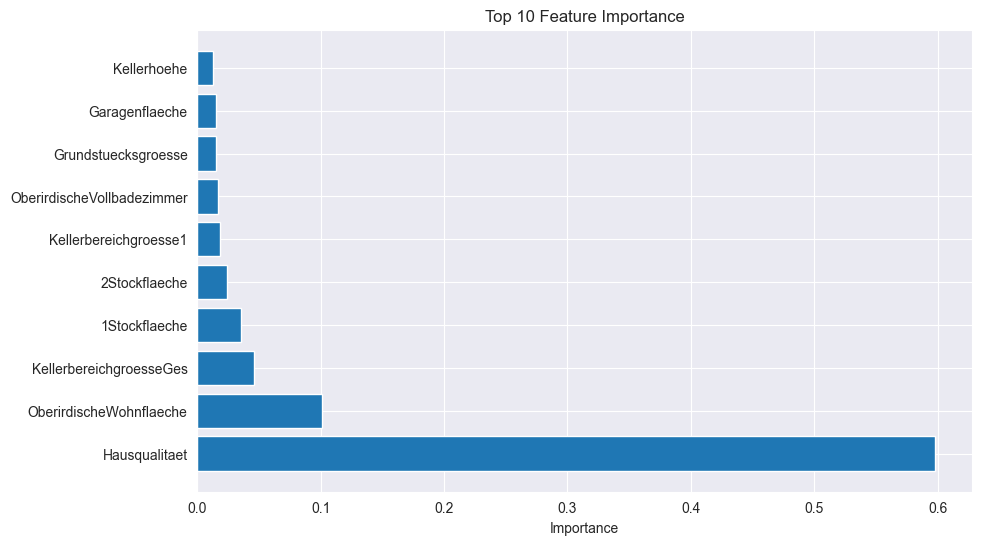

In [14]:
rf_model = RandomForestRegressor(random_state=123)
rf_model.fit(X_train, y_train)

# Feature Importance berechnen
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Feature Importance mittels Dataframe anzeigen
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:10], feature_importance_df['Importance'][:10])
plt.xlabel('Importance')
plt.title('Top 10 Feature Importance')
plt.show()

# GradientBoostingRegressor

In [15]:
selected_features = feature_importance_df['Feature'][:10]
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected.head()

,Hausqualitaet,OberirdischeWohnflaeche,KellerbereichgroesseGes,1Stockflaeche,2Stockflaeche,Kellerbereichgroesse1,OberirdischeVollbadezimmer,Grundstuecksgroesse,Garagenflaeche,Kellerhoehe
Id,,,,,,,,,,
1,3,84.96,0.00,84.96,0.00,0.0,1,918.54,47.52,4
2,5,98.10,98.10,98.10,0.00,88.2,1,632.16,40.50,0
3,6,139.50,73.53,84.60,54.90,0.0,1,1960.20,28.62,3
4,6,147.96,84.69,86.49,61.47,0.0,2,868.41,41.40,2
5,8,136.53,71.28,71.28,65.25,0.0,1,1029.15,36.00,2


In [16]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [17]:
gb_model = GradientBoostingRegressor(random_state=123)
gb_model.fit(X_train_selected, y_train)

# Vorhersagen für Trainingsdaten
y_train_pred_gb = gb_model.predict(X_train_selected)
# Bewertung der Modellleistung
train_mse_gb = mean_squared_error(y_train, y_train_pred_gb)
train_rmse_gb = np.sqrt(train_mse_gb)
print(f'Trainings-MSE (Gradient Boosting): {train_mse_gb:.2f}')
print(f'Trainings-RMSE (Gradient Boosting): {train_rmse_gb:.2f}')
print(f'Trainings-R2: {r2_score(y_train, y_train_pred_gb):.2f}')

# Vorhersagen für Testdaten
y_test_pred_gb = gb_model.predict(X_test_selected)

Trainings-MSE (Gradient Boosting): 254637537.94
Trainings-RMSE (Gradient Boosting): 15957.37
Trainings-R2: 0.95


In [18]:
y_test_pred_gb

array([133590.05143596,  88641.60280202,  61732.46168789, 110632.36839766,
       125421.38854994, 139633.6603947 ,  87984.53130175, 108478.45134165,
       264749.39763433,  63555.45911974, 120455.30993156, 168056.12627023,
       214106.47366518, 248701.85778963, 109905.72607087, 162964.24360654,
       161125.15276081, 246407.7331029 , 203166.93598864, 157805.16095359,
       190089.21202467, 172590.29369929,  81290.43814801, 113790.39899279,
       105647.38754951, 187122.7200933 , 146340.47447137, 101368.43641422,
       171237.93983647, 114298.59095606, 112934.70313755, 133590.05143596,
       212930.23135725, 237793.76618222, 187364.48875297, 111302.03550464,
       159397.94157062, 186079.14721179, 153426.35704453, 107317.02097048,
       151136.50182027,  91134.4410488 , 132755.25452804, 107371.49354823,
       196337.90285777, 122867.15390617, 170148.01494366, 183518.12241299,
       229825.96580452,  76903.36180316, 296895.46839147, 129322.53836014,
       133801.66483154,  

In [19]:
y_test_pred_gb.mean()

153314.986917395

In [20]:
df_export = pd.DataFrame({
    'Id': df_test.index,
    'Verkaufspreis': y_test_pred_gb
})
df_export.to_csv('predictions.csv', index=False)